<a href="https://colab.research.google.com/github/moshimoshipandasan/waseda/blob/main/R%E5%AE%9F%E6%8A%80%E8%A9%A6%E9%A8%93%E8%A7%A3%E8%AA%AC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#R言語演習
<font color ='red'>【注意事項】</font>演習内容は自動保存されません。必ずメニューの<font color ='red'>[ファイル]-->[保存]</font>で保存しましょう。または<font color ='red'>CTRL+S</font>でも保存できます。

##問題1 Helloの表示
入力値なしで "Hello Gakuin!" を出力する関数<br>
`hellogakuin()`<br>
を作成せよ。値を表示させるだけでなく、関数として値を出力するようにすること）

In [ ]:
hellogakuin <- function(){
  return("Hello Gakuin!")
}

hellogakuin()

<font color ="red">問題１のポイント</font>
```R
関数名 <-- funstion(){
  return("表示する文字")
}

関数名()
```
<hr>

###問題2～問題4のサンプルデータmarkの準備

In [ ]:
# 問題2を解く前に、平均：65, 標準偏差：12 の正規分布に従う乱数を100個生成してサンプルデータを用意しておく。
mark <- round(rnorm(100, mean = 65, sd = 12),0)
mark

##問題2 平均
mark を 母集団の点数データとする平均を返す関数<br>
`average( data )`<br>
を作成せよ。（ただしmean関数は使わない）



In [ ]:
average <- function(data){
  n <- length(data)
  s <- sum(data)
  return(s/n)
}

average(mark)

<font color ="red">問題２のポイント</font>
```R
関数名 <-- funstion(引数){
  関数内での処理（複数行可）
  return(戻り値)
}

関数名()
```
<hr>

##問題3 分散
mark を 母集団の点数データとする分散を返す関数<br>
`variance( data )`<br>
を作成せよ。（Excelのvar.p関数にあたるもの）ここではvar関数を使わず、分散の定義にもとづいて計算する


In [ ]:
variance <- function(data){
	n <- length(data)
	m <- average(data) #mean(data)も可
	ss <- (data-m)^2
	return(sum(ss)/n)
}

variance(mark)

<font color ="red">問題３・問題４のポイント</font><br>
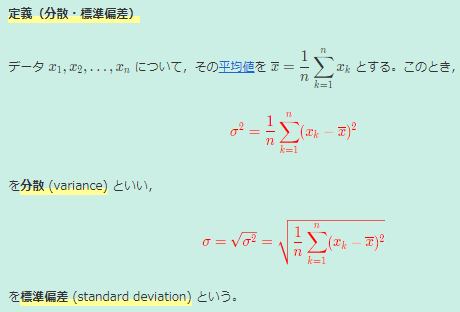

<hr>

##問題4 標準偏差
mark を 母集団の点数データとする標準偏差を返す関数<br>
`stdev( data )`<br>
を作成せよ（Excelのstdev.p関数にあたるもの）

In [ ]:
stdev <- function(data){
	return(sqrt(variance(data))) #variance(data)^(1/2)も可
}

stdev(mark)

<hr>

##問題5のサンプルデータの準備

In [ ]:
# 一様乱数を1000個作成する
rndx <- runif(1000, min = 0, max = 1)
rndy <- runif(1000, min = 0, max = 1)
rndye <- runif(1001, min = 0, max = 1)

##問題5 モンテカルロ法で円周率を求める1
この生成した0～1の数値を，rndxをx座標，rdnyをy座標として，前から順番に座標として捉える。<br>
このとき，半径1の円の内側にある点の個数と，すべての点の個数の比を4倍した値を求める関数<br>
`pi2`<br>
を作成せよ。
その際，rndx，rdnyそれぞれの要素の個数が一致しない場合はエラーメッセージを出すように条件分岐をさせなさい。


In [ ]:
pi2 <- function(x,y){
	if(length(x) != length(y)){
	 	return("Dimension Error!!")
	}
	else{
		n <- length(x)
		m <- sum(floor(sqrt((x^2+y^2)))) # sum(sqrt((x^2+y^2))>1) のような書き方もある
		return(4*(n-m)/n)
	}
}

pi2(rndx,rndy)

#エラーメッセージ "Dimension Error!!"
pi2(rndx,rndye)

<font color ="red">問題５のポイント</font>
###モンテカルロ法
http://www.cmpt.phys.tohoku.ac.jp/open-campus/2020/pi/

###floor関数
指定した値(整数部分)を超えない最大の整数を求める

In [ ]:
# floor関数を使って半径1の円の内側にある点の個数を数える
# 例 半径の内側の場合は0
floor(0.32231)
# 例 半径の外側の場合は1
floor(1.21862)

<hr>

##問題6 モンテカルロ法で円周率を求める2
上記の関数 pi2 を用いて，乱数をn個発生させてπ（円周率）の近似値を求める<br>
`monte_pi`<br> 
関数を作成せよ。



In [ ]:
monte_pi <- function(n){
	x <- runif(n, min = 0, max = 1)
	y <- runif(n, min = 0, max = 1)

	return(pi2(x,y))
}

monte_pi(100000)

[1] 3.14172

<font color ="red">問題６のポイント</font><br>

```R
一様乱数をn個作成する
rndx <- runif(n, min = 0, max = 1)
rndy <- runif(n, min = 0, max = 1)
```
と<br>
`pi2(rndx,rndy)`<br>
を組み合わせて関数monte_piを作成する。
<hr>

##問題7 内積
2つのベクトルa，bの内積を，次の2通りの方法で求めよ。<br>
(1) 対応する要素同士の積の総和を計算する（数学Ⅱ(b)で習った内容）<br>
(2) ベクトルの内積の「演算子」を使って計算する<br>

In [ ]:
a <- c(1,2,3)
b <- c(-1,0,3)

a*b
sum(a*b)	# (1)の方法

a %*% b		# (2)の方法

<font color ="red">問題７のポイント</font><br>
問題７の内積は問題８の準備問題である
<hr>

###問題8のサンプルデータkakaku、kosuuの準備
ある100個の商品の単価と，それぞれの購入個数が次のベクトルで与えられているとる。<br>
kakaku :単価のベクトル<br>
kosuu :購入個数のベクトル


In [ ]:
kakaku <- floor(100*runif(100, min = 0, max = 1)+50)*10
kakaku
kosuu  <- floor(4*runif(100, min = 0, max = 1))
kosuu

##問題8 単価と合計金額
このとき，これらの商品の購入合計金額を求める<br>
`inner_product`<br>
関数を作成せよ（自分でコードを書くこと）。

In [ ]:
inner_product <- function(x, y){
	return( x %*% y )
}

inner_product(kakaku, kosuu)

<hr>

##問題9 速さと距離
あなたは校門が閉まるまでに学校に到着しなければなりません。（時間ぴったりであればセーフです）<br>
あなたは、以下の速度で移動することができるものとします。<br>
* 普通に歩く（"slow walk"）: 分速100メートル
* 急いで歩く（"fast walk"）: 分速120メートル
* 急いで走る（"fast run"） : 分速160メートル

ただし、なるべくゆっくり移動するものとします。（途中で移動のペースは変えず、一定の速度をキープします）
自宅から学校までの距離が n メートル、家を出発する時間が校門が閉まる m 分前としたとき，"slow walk"，"fast walk"，"fast run"のどれが最適かを出力する<br>
`moving`<br>
関数を作成しなさい（メッセージは return 関数で出力する）。<br>
なお、急いで走っても間に合わない場合は「普通に歩く」ことにします。


In [ ]:
moving <- function(n, m){
	if(n/100 <= m){
		return("slow walk")
	}
	else if(n/120 <= m){
		return("fast walk")
	}
	else if(n/160 <= m){
		return("fast run")
	}
	else{
		return("slow walk")
	}
}

# 以下の実行出力結果
# moving(1200, 20) ... "slow walk"
# moving(1600, 15) ... "fast walk"
# moving(1800, 12) ... "fast run"
# moving( 500,  2) ... "slow walk"

moving(1200, 20) 
moving(1600, 15) 
moving(1800, 12) 
moving( 500,  2) 


<hr>

##問題10 if文・else文の組合せ
スーパーマーケット「ガクイン」では，買い物をすると会員種別によって，以下のようにポイントが付きます（ただし、小数点以下は切り捨てとします）。
* シルバー会員は，ポイントが支払い総額の5パーセント付きます。
* ゴールド会員は，ポイントが支払い総額の8パーセント付きます。
 * さらに，支払総額が5000円を超えると，1000円ごとに100ポイント付きます。
* 会員でない人はポイントが付きません。
いま，会員種別 class と，支払総額 total を入力したときに取得できるポイントを出力する<br>
`g-point`<br>
関数を作成しなさい。ただし，会員種別は<br>
* シルバー会員：1
* ゴールド会員：2
* 会員でない：0

とし，それ以外の会員種別が入力された場合は"Input Error !!"と出力するようにしてださい。

In [ ]:
gpoint <- function(class, total){
	x <- 0
	if(class == 1){
		x <- floor(total*.05)
	}else if(class == 2){
		x <- floor(total*.08)
		if(total > 5000){
			x <- x + 100*floor((total - 5000)/1000)
		}
	}else if(class == 0){
		x <- 0
	}else{
		x <- "Input Error !!"
	}
	return(x)
}

# 以下の実行出力結果
# gpoint(0, 20000) ... [1] 0
# gpoint(1, 5999)  ... [1] 299
# gpoint(1, 6000)  ... [1] 300
# gpoint(2, 5999)  ... [1] 479
# gpoint(2, 6000)  ... [1] 580
# gpoint(3, 20000) ... [1] "Input Error !!"

gpoint(0, 20000)
gpoint(1, 5999)
gpoint(1, 6000)
gpoint(2, 5999)
gpoint(2, 6000)
gpoint(3, 20000)

<hr>

##問題11 並べ替え バブルソート1
2つの整数値からなるベクトル zseq を入力したときに、この値を昇順にしたベクトルを出力する<br>
`asort`<br>
関数を作成しなさい。<br>

In [ ]:
asort <- function(zseq){
	if(zseq[1] > zseq[2]){
		x <- zseq[1]
		zseq[1] <- zseq[2]
		zseq[2] <- x
	}
	return(zseq)
}

v <- c(2, 1)
asort(v)

In [ ]:
# 問題11の別解
asort <- function(zseq){
	if(zseq[1] > zseq[2]){
		x <- zseq[1]
		y <- zseq[2]
		zseq[1] <- y
		zseq[2] <- x
	}
	return(zseq)
}

##問題12 並べ替え バブルソート2
3つの整数値からなるベクトル zseq を入力したときに、この値を昇順にしたベクトルを出力する<br>
`asort3`<br>
関数を作成しなさい。

In [ ]:
asort3 <- function(zseq){
	if(zseq[1] > zseq[2]){
		x <- zseq[1]
		zseq[1] <- zseq[2]
		zseq[2] <- x
	}
	if(zseq[2] > zseq[3]){
		x <- zseq[2]
		zseq[2] <- zseq[3]
		zseq[3] <- x
	}
	if(zseq[1] > zseq[2]){
		x <- zseq[1]
		zseq[1] <- zseq[2]
		zseq[2] <- x
	}
	return(zseq)
}

v <- c(2, 3, 1)
asort3(v)

##おまけ バブルソート完成版

In [ ]:
bubblesort <- function(zseq){
  n <- length(zseq)
  for (i in 1:(n - 1)){
    for (j in 1:(n - i)){
      if(zseq[j] > zseq[j + 1]){
        x <- zseq[j]
        zseq[j] <- zseq[j + 1]
        zseq[j + 1] <- x
      }
    }
  }
  return(zseq)
}

v <- c(5, 3, 1, 2, 4)
bubblesort(v)